# Feature analysis 
First of all we will get into each feature individually, get a description of it and 
view if it has an important value to the recommendation system 

## Credits
For the credits datset we encounter three types of dataset, the cast, crew and the id. We'll only research further into a feature if it is not self explanatory

In [1]:
import utils
import pandas as pd
credits = pd.read_csv(utils.data_credits)
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


### Cast
Now for each movie we have a list of cast dictionaries, each dictionary contains the cast id, the character it represents the id of the credit, its gender, its id(?), the real name of the cast, the order and a profile path. 

Surely we can discard the profile path

In [2]:
import json 
import ast 

c = credits['cast'][0]
c = ast.literal_eval(c)
c[10]

{'cast_id': 24,
 'character': 'Sergeant (voice)',
 'credit_id': '52fe4284c3a36847f8024fb9',
 'gender': 2,
 'id': 8655,
 'name': 'R. Lee Ermey',
 'order': 10,
 'profile_path': '/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg'}

### Crew
The crew is very similar to the cast, but it differentiates from it by having a department and job instead of character, credit id and order

In [3]:
import json 
import ast 

c = credits['crew'][0]
c = ast.literal_eval(c)
c[10]

{'credit_id': '52fe4284c3a36847f8024f91',
 'department': 'Art',
 'gender': 2,
 'id': 7883,
 'job': 'Art Direction',
 'name': 'Ralph Eggleston',
 'profile_path': '/uUfcGKDsKO1aROMpXRs67Hn6RvR.jpg'}

## Keywords


In [4]:
keywords = pd.read_csv(utils.data_keywords)
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


### Keywords feature
This feature contains a list of (id, name) pairs from which we can extract only the id since 
it is a numerical equivalence. We should also create a hash function to convert each name to its equivalence, this way we can apply the recommender to a user

In [5]:
c = keywords['keywords'][0]
c = ast.literal_eval(c)
c

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [6]:
c = keywords['keywords'][10]
c = ast.literal_eval(c)
c

[{'id': 833, 'name': 'white house'},
 {'id': 840, 'name': 'usa president'},
 {'id': 1605, 'name': 'new love'},
 {'id': 33476, 'name': 'widower'},
 {'id': 211505, 'name': 'wildlife conservation'}]

## Links 
We will ignore links_small because it is just a reduced version. The links and links_small file do not seem useful at all, they only contain id equivalencies (id that where arbitrarly assigned)

In [7]:
links = pd.read_csv(utils.data_links)
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Movies metadata 
The metadata file contains information about the movie itself, a lot of the information must be parsed and every categorical and literal attribure must be converted into an encoding, we can also see some redundant attr. such as original title and title, that might differ a little bit but have usually the same name. From the release date it might be interesting to separate the month and day of release, we need a further analysis to see if there is a real correlation between the exact day/month/year and the likeness of the movie. Some attributes such as the spoken languages, video,  and status need to be looked into further, because it seems that their values repeat all the time (i.e. english and Released)

In [8]:
metadata = pd.read_csv(utils.data_movies_metadata)
metadata.head()

/home/pol/PROJECTS/ML/.ai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [10]:
metadata['popularity']

0         21.9469
1         17.0155
2         11.7129
3         3.85949
4         8.38752
           ...   
45461    0.072051
45462    0.178241
45463    0.903007
45464    0.003503
45465    0.163015
Name: popularity, Length: 45466, dtype: object

Describing the metadata is very useful as it informs of that the order of magnitude of the count of ratings is much higher compared to the number of movies

In [18]:
metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## Ratings
The ratings data seems harder to work through since we need a relationship between the movies their rating and the user. The timestaps does not have a specific value right now, I don't think that the time when the user rated the movie has something to do with the movie itself, or at least we won't find the specific relationship, either way, more reaearch is required

In [11]:
ratings = pd.read_csv(utils.data_ratings)
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


Describing this rating we can see something odd, the min rating is 

In [17]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [20]:
ratings['rating'].min()

0.5

# Data analysis

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline


## Dates distribution by day

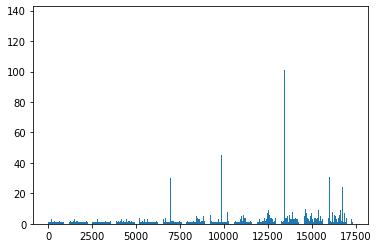

In [30]:
import numpy as np

dates = metadata['release_date'].dropna()

dates_count = {}
for d in dates:
    if d in dates_count:
        dates_count[d] += 1 
    else:
        dates_count[d] = 1 

values = [dates_count[k] for k in sorted(dates_count.keys())]
plt.bar(np.arange(len(dates_count)), values)
plt.show()

## Dates distribution by year only

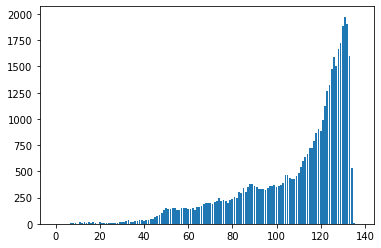

In [38]:
import numpy as np

dates = metadata['release_date'].dropna()

dates_count = {}
for d in dates:
    d = d.split('-')[0]
    if d in dates_count:
        dates_count[d] += 1 
    else:
        dates_count[d] = 1 

values = [dates_count[k] for k in sorted(dates_count.keys())]
total_dates = np.arange(len(dates_count))
plt.bar(total_dates, values)
plt.show()

In [39]:
print(sorted(dates_count.keys()))

['1', '12', '1874', '1878', '1883', '1887', '1888', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '200

## Keywords distribution

In [41]:
keywords['keywords']

0        [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        [{'id': 10090, 'name': 'board game'}, {'id': 1...
2        [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3        [{'id': 818, 'name': 'based on novel'}, {'id':...
4        [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
                               ...                        
46414               [{'id': 10703, 'name': 'tragic love'}]
46415    [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416                                                   []
46417                                                   []
46418                                                   []
Name: keywords, Length: 46419, dtype: object